## 1. 사용할 패키지 불러오기

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression

## 2. 데이터 불러오기

In [235]:
data = pd.read_csv("preprocessed_data.csv", encoding='euc-kr')
data.head()

,seat,age,gender,price,ticket_cancel,member_yn,performance_code_nodup,duplicated_seat,count_seat,reservation_rate,...,무료,블루,골드,싹틔우미,노블,그린,discount_percent,calculated_price,holiday,group
0,2층 E블록1열 1,50.0,F,42000,0,Y,10,1,631.0,0.251896,...,1,0,1,0,0,0,30.0,60000.0,0,6983
1,3층 B블록4열 7,60.0,F,35000,0,Y,56,0,633.0,0.252695,...,1,1,1,0,0,0,30.0,50000.0,0,39301
2,1층 D블록15열 13,70.0,F,10000,0,Y,81,0,636.0,0.253892,...,1,0,0,0,1,0,NaN,50000.0,0,56856
3,1층 B블록11열 1,40.0,F,10000,0,Y,114,0,627.0,0.250299,...,1,0,1,0,0,0,NaN,50000.0,0,79970
4,1층 C블록6열 1,70.0,F,10000,0,Y,154,0,636.0,0.253892,...,1,1,0,0,0,0,NaN,50000.0,0,107935


In [236]:
seat = data['seat']

### - Dummy 변수들을 One hot encoding

In [237]:
data = pd.get_dummies(data.iloc[:, 1:])
data.head()

,age,price,ticket_cancel,performance_code_nodup,duplicated_seat,count_seat,reservation_rate,tran_gap_score,무료,블루,...,member_yn_Y,discount_catagory_기타,discount_catagory_기획사,discount_catagory_복지할인,discount_catagory_클러버,new_genre_교향곡,new_genre_기타,new_genre_독주,new_genre_오페라_성악,new_genre_합창
0,50.0,42000,0,10,1,631.0,0.251896,-534.130745,1,0,...,True,False,False,False,True,True,False,False,False,False
1,60.0,35000,0,56,0,633.0,0.252695,-596.400474,1,1,...,True,False,False,False,True,True,False,False,False,False
2,70.0,10000,0,81,0,636.0,0.253892,-513.275157,1,0,...,True,True,False,False,False,True,False,False,False,False
3,40.0,10000,0,114,0,627.0,0.250299,-527.584530,1,0,...,True,True,False,False,False,True,False,False,False,False
4,70.0,10000,0,154,0,636.0,0.253892,-520.104560,1,1,...,True,True,False,False,False,True,False,False,False,False


In [238]:
data['seat'] = seat

## 3. K-means Clustering

### (1) NaN을 0으로 대체한다.

In [239]:
clustering_data = data.fillna(0)

### (2) Seat 별로 그룹화

In [240]:
clustering_data_grouped = clustering_data.groupby(['seat']).mean().reset_index()
cluster_seat = clustering_data_grouped['seat']
clustering_data_grouped.head()

,seat,age,price,ticket_cancel,performance_code_nodup,duplicated_seat,count_seat,reservation_rate,tran_gap_score,무료,...,member_yn_Y,discount_catagory_기타,discount_catagory_기획사,discount_catagory_복지할인,discount_catagory_클러버,new_genre_교향곡,new_genre_기타,new_genre_독주,new_genre_오페라_성악,new_genre_합창
0,1층 A블록10열 1,42.631579,61250.000000,0.710526,1035.921053,0.065789,443.447368,0.177025,-2170.572762,0.921053,...,0.921053,0.236842,0.0,0.092105,0.671053,0.868421,0.000000,0.092105,0.000000,0.039474
1,1층 A블록10열 10,44.457831,73837.349398,0.783133,1052.054217,0.090361,450.180723,0.179713,-7455.974084,0.963855,...,0.963855,0.192771,0.0,0.150602,0.656627,0.783133,0.012048,0.084337,0.048193,0.066265
2,1층 A블록10열 11,47.127660,75106.382979,0.734043,946.712766,0.095745,472.590426,0.188659,-6726.811356,0.989362,...,0.989362,0.186170,0.0,0.117021,0.696809,0.787234,0.005319,0.085106,0.047872,0.063830
3,1층 A블록10열 2,42.926829,53475.609756,0.731707,981.329268,0.146341,463.695122,0.185108,-2531.438840,0.926829,...,0.926829,0.280488,0.0,0.060976,0.658537,0.829268,0.000000,0.097561,0.036585,0.036585
4,1층 A블록10열 3,41.052632,56052.631579,0.605263,968.144737,0.105263,465.157895,0.185692,-2924.412253,0.907895,...,0.894737,0.328947,0.0,0.092105,0.578947,0.789474,0.000000,0.118421,0.039474,0.039474


In [241]:
clustering_data_grouped.columns

Index(['seat', 'age', 'price', 'ticket_cancel', 'performance_code_nodup',
       'duplicated_seat', 'count_seat', 'reservation_rate', 'tran_gap_score',
       '무료', '블루', '골드', '싹틔우미', '노블', '그린', 'discount_percent',
       'calculated_price', 'holiday', 'group', 'gender_F', 'gender_M',
       'member_yn_N', 'member_yn_Y', 'discount_catagory_기타',
       'discount_catagory_기획사', 'discount_catagory_복지할인',
       'discount_catagory_클러버', 'new_genre_교향곡', 'new_genre_기타',
       'new_genre_독주', 'new_genre_오페라_성악', 'new_genre_합창'],
      dtype='object')

In [243]:
max(clustering_data_grouped['ticket_cancel'])

2.0

In [244]:
clustering_data_grouped = clustering_data_grouped.loc[:, ['seat', 'price', 'ticket_cancel',
       '무료', '블루', '골드', '싹틔우미', '노블', '그린', 'reservation_rate', 'tran_gap_score',
       'discount_percent',
       'holiday', ]]

### (3) Normalize

In [264]:
clustering_data_grouped_Norm = preprocessing.normalize(clustering_data_grouped.iloc[:, 1:])
clustering_data_grouped_Norm = pd.DataFrame(clustering_data_grouped_Norm)
clustering_data_grouped_Norm.columns = clustering_data_grouped.columns[1:]

### (4) K-means Clustering

In [265]:
best_silhouette_score = 0
for n_clusters in range(5,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(clustering_data_grouped_Norm)
    #centers = clusterer.cluster_centers_

    score = silhouette_score(clustering_data_grouped_Norm, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    if score > best_silhouette_score:
        best_silhouette_score = score
        best_preds = preds

/home/jongwook95.lee/miniforge3/envs/kmong_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jongwook95.lee/miniforge3/envs/kmong_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5, silhouette score is 0.5746694087281585)
For n_clusters = 6, silhouette score is 0.5727564292131836)


/home/jongwook95.lee/miniforge3/envs/kmong_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jongwook95.lee/miniforge3/envs/kmong_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7, silhouette score is 0.5491691316439696)
For n_clusters = 8, silhouette score is 0.5471105168961543)
For n_clusters = 9, silhouette score is 0.5499371222140413)


/home/jongwook95.lee/miniforge3/envs/kmong_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [266]:
print("Best N Cluster: 5, Silhouette Score: {}".format(best_silhouette_score))

Best N Cluster: 5, Silhouette Score: 0.5746694087281585


In [267]:
Counter(best_preds)

Counter({4: 1167, 1: 753, 0: 364, 3: 164, 2: 42})

In [268]:
clustering_data_grouped['Cluster'] = best_preds
clustering_data_grouped.head()

,seat,price,ticket_cancel,무료,블루,골드,싹틔우미,노블,그린,reservation_rate,tran_gap_score,discount_percent,holiday,Cluster
0,1층 A블록10열 1,61250.000000,0.710526,0.921053,0.250000,0.434211,0.105263,0.092105,0.197368,0.177025,-2170.572762,21.184211,0.131579,4
1,1층 A블록10열 10,73837.349398,0.783133,0.963855,0.337349,0.427711,0.102410,0.060241,0.307229,0.179713,-7455.974084,23.373494,0.072289,1
2,1층 A블록10열 11,75106.382979,0.734043,0.989362,0.351064,0.452128,0.085106,0.085106,0.287234,0.188659,-6726.811356,23.563830,0.026596,1
3,1층 A블록10열 2,53475.609756,0.731707,0.926829,0.243902,0.414634,0.121951,0.073171,0.231707,0.185108,-2531.438840,20.426829,0.121951,4
4,1층 A블록10열 3,56052.631579,0.605263,0.907895,0.210526,0.421053,0.131579,0.078947,0.184211,0.185692,-2924.412253,17.565789,0.131579,4


### (5) 바이올린 시각화

/tmp/ipykernel_18132/2107489577.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=clustering_data_grouped["Cluster"], y=clustering_data_grouped["tran_gap_score"], palette="Blues")


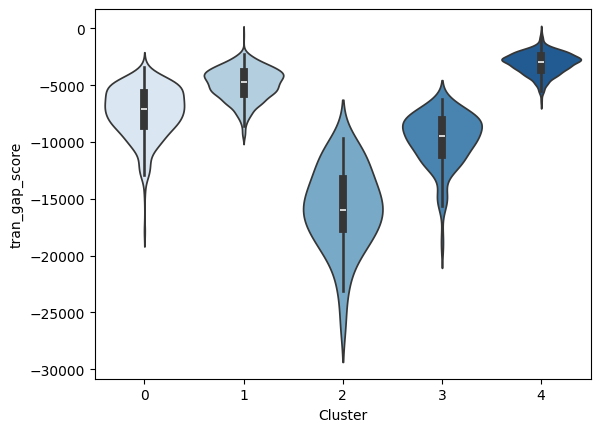

In [272]:
sns.violinplot(x=clustering_data_grouped["Cluster"], y=clustering_data_grouped["tran_gap_score"], palette="Blues")
plt.show()

/tmp/ipykernel_18132/1244742544.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=clustering_data_grouped["Cluster"], y=clustering_data_grouped["price"], palette="Blues")


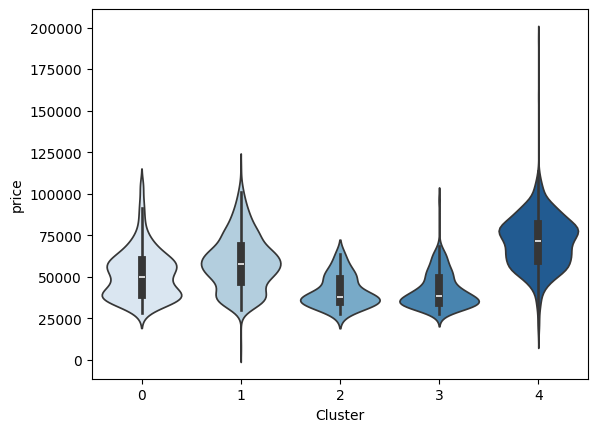

In [273]:
sns.violinplot(x=clustering_data_grouped["Cluster"], y=clustering_data_grouped["price"], palette="Blues")
plt.show()

/tmp/ipykernel_18132/307570757.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=clustering_data_grouped["Cluster"], y=clustering_data_grouped["reservation_rate"], palette="Blues")


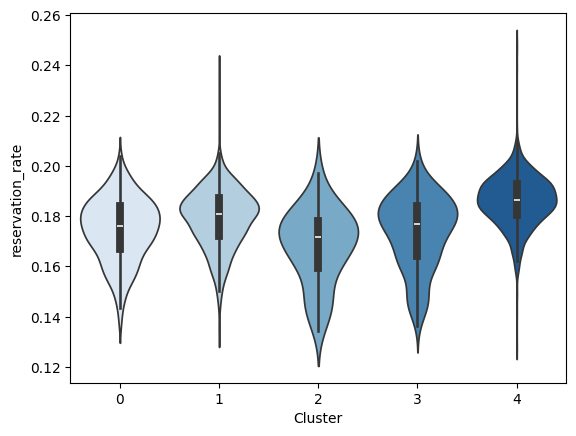

In [274]:
sns.violinplot(x=clustering_data_grouped["Cluster"], y=clustering_data_grouped["reservation_rate"], palette="Blues")
plt.show()

/tmp/ipykernel_18132/2212800834.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=clustering_data_grouped["Cluster"], y=clustering_data_grouped["discount_percent"], palette="Blues")


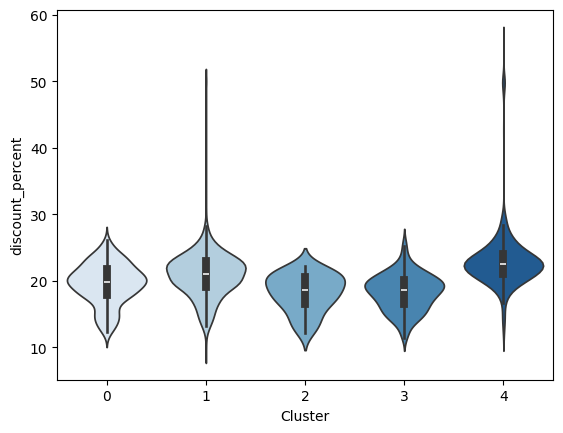

In [275]:
sns.violinplot(x=clustering_data_grouped["Cluster"], y=clustering_data_grouped["discount_percent"], palette="Blues")
plt.show()

## 4. Random Forest 가격 에측

### (1) Linear Regression을 이용한 결측치 대체

In [281]:
Input_variable = list(set(data.columns) - set(['age', 'discount_percent', 'seat', 'calculated_price']))
Target_variable = ['age', 'discount_percent']

#### - Age 대체

In [285]:
train_X = data.loc[-pd.isna(data['age']), Input_variable]
test_X = data.loc[pd.isna(data['age']), Input_variable]

train_y = data['age'][-pd.isna(data['age'])]

In [289]:
line_fitter = LinearRegression()
line_fitter.fit(train_X, train_y)
age_predit = line_fitter.predict(test_X)
data['age'][pd.isna(data['age'])] = age_predit

/tmp/ipykernel_18132/58780289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'][pd.isna(data['age'])] = age_predit


#### - discount_percent 대체

In [290]:
train_X = data.loc[-pd.isna(data['discount_percent']), Input_variable]
test_X = data.loc[pd.isna(data['discount_percent']), Input_variable]

train_y = data['discount_percent'][-pd.isna(data['discount_percent'])]

In [293]:
line_fitter = LinearRegression()
line_fitter.fit(train_X, train_y)
discount_percent_predit = line_fitter.predict(test_X)
data['discount_percent'][pd.isna(data['discount_percent'])] = discount_percent_predit

/tmp/ipykernel_18132/3477356629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['discount_percent'][pd.isna(data['discount_percent'])] = discount_percent_predit


### (2) Seat 별 그룹화

In [294]:
data_grouped = data.groupby(['seat']).mean().reset_index()
data_grouped.head()

,seat,age,price,ticket_cancel,performance_code_nodup,duplicated_seat,count_seat,reservation_rate,tran_gap_score,무료,...,member_yn_Y,discount_catagory_기타,discount_catagory_기획사,discount_catagory_복지할인,discount_catagory_클러버,new_genre_교향곡,new_genre_기타,new_genre_독주,new_genre_오페라_성악,new_genre_합창
0,1층 A블록10열 1,46.167104,61250.000000,0.710526,1035.921053,0.065789,443.447368,0.177025,-2170.572762,0.921053,...,0.921053,0.236842,0.0,0.092105,0.671053,0.868421,0.000000,0.092105,0.000000,0.039474
1,1층 A블록10열 10,46.113857,73837.349398,0.783133,1052.054217,0.090361,450.180723,0.179713,-7455.974084,0.963855,...,0.963855,0.192771,0.0,0.150602,0.656627,0.783133,0.012048,0.084337,0.048193,0.066265
2,1층 A블록10열 11,47.619265,75106.382979,0.734043,946.712766,0.095745,472.590426,0.188659,-6726.811356,0.989362,...,0.989362,0.186170,0.0,0.117021,0.696809,0.787234,0.005319,0.085106,0.047872,0.063830
3,1층 A블록10열 2,46.206412,53475.609756,0.731707,981.329268,0.146341,463.695122,0.185108,-2531.438840,0.926829,...,0.926829,0.280488,0.0,0.060976,0.658537,0.829268,0.000000,0.097561,0.036585,0.036585
4,1층 A블록10열 3,46.106983,56052.631579,0.605263,968.144737,0.105263,465.157895,0.185692,-2924.412253,0.907895,...,0.894737,0.328947,0.0,0.092105,0.578947,0.789474,0.000000,0.118421,0.039474,0.039474


### (3) RandomForest